In [ ]:
# iranian churn dataset
# my drive
# https://drive.google.com/file/d/1BKpDDOHVj8ClwJZbv88VCLIr_SedvY_s/view?usp=sharing
# churn mean: the rate at which customers stop doing business with a company over a given period of time. 

In [ ]:
import pandas as pd
import numpy as np

# Data Loading (take csv file from drive)
url='https://drive.google.com/file/d/1BKpDDOHVj8ClwJZbv88VCLIr_SedvY_s/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
print("Data Frame:")
df.head()

Data Frame:


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [ ]:
# Change Column Name for Ease in detection
df.rename(columns = {"Call  Failure": "Call_Failure", "Subscription  Length": "Subscription_Length", "Charge  Amount": "Charge_Amount",
                   "Seconds of Use": "Seconds_of_Use", "Frequency of use": "Frequency_of_use", "Frequency of SMS": "Frequency_of_SMS", "Distinct Called Numbers": "Distinct_Called_Numbers",
                   "Age Group": "Age_Group", "Tariff Plan": "Tariff_Plan", "Customer Value": "Customer_Value"},inplace=True)
print(df.columns)

Index(['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount',
       'Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status', 'Age',
       'Customer_Value', 'FN', 'FP', 'Churn'],
      dtype='object')


In [ ]:
# Data Processing
print("Missing value:")
print(df.isna().sum())#missing values
print("catagorical value:")
print(df.info())#catagorical values
# Not have missing values

Missing value:
Call_Failure               0
Complains                  0
Subscription_Length        0
Charge_Amount              0
Seconds_of_Use             0
Frequency_of_use           0
Frequency_of_SMS           0
Distinct_Called_Numbers    0
Age_Group                  0
Tariff_Plan                0
Status                     0
Age                        0
Customer_Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64
catagorical value:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call_Failure             3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription_Length      3150 non-null   int64  
 3   Charge_Amount            3150 non-null   int64  
 4   Seconds_of_Use           3150 non-null   int64  
 5  

In [ ]:
print("statistical value:")
print(df.describe())#statistical propotion

statistical value:
       Call_Failure    Complains  Subscription_Length  Charge_Amount  \
count   3150.000000  3150.000000          3150.000000    3150.000000   
mean       7.627937     0.076508            32.541905       0.942857   
std        7.263886     0.265851             8.573482       1.521072   
min        0.000000     0.000000             3.000000       0.000000   
25%        1.000000     0.000000            30.000000       0.000000   
50%        6.000000     0.000000            35.000000       0.000000   
75%       12.000000     0.000000            38.000000       1.000000   
max       36.000000     1.000000            47.000000      10.000000   

       Seconds_of_Use  Frequency_of_use  Frequency_of_SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000      

In [ ]:
# Count distinct value in Target
print(df["Churn"].value_counts())
print("0: No, ", "1: Yes")

0    2655
1     495
Name: Churn, dtype: int64
0: No,  1: Yes


In [ ]:
# Divide the set in Features and Target
X = df
y = df.pop("Churn")
print(X)
print(y)

      Call_Failure  Complains  Subscription_Length  Charge_Amount  \
0                8          0                   38              0   
1                0          0                   39              0   
2               10          0                   37              0   
3               10          0                   38              0   
4                3          0                   38              0   
...            ...        ...                  ...            ...   
3145            21          0                   19              2   
3146            17          0                   17              1   
3147            13          0                   18              4   
3148             7          0                   11              2   
3149             8          1                   11              2   

      Seconds_of_Use  Frequency_of_use  Frequency_of_SMS  \
0               4370                71                 5   
1                318                 5             

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Extract numerical features into a separate DataFrame
numerical_features = X.select_dtypes(include=['float64', 'int64'])

# Standardization
standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(numerical_features),
                                     columns=numerical_features.columns)

print(X)

      Call_Failure  Complains  Subscription_Length  Charge_Amount  \
0         0.051229  -0.287830             0.636726      -0.619962   
1        -1.050285  -0.287830             0.753384      -0.619962   
2         0.326608  -0.287830             0.520069      -0.619962   
3         0.326608  -0.287830             0.636726      -0.619962   
4        -0.637217  -0.287830             0.636726      -0.619962   
...            ...        ...                  ...            ...   
3145      1.841189  -0.287830            -1.579761       0.695109   
3146      1.290432  -0.287830            -1.813076       0.037573   
3147      0.739675  -0.287830            -1.696418       2.010180   
3148     -0.086460  -0.287830            -2.513019       0.695109   
3149      0.051229   3.474268            -2.513019       0.695109   

      Seconds_of_Use  Frequency_of_use  Frequency_of_SMS  \
0          -0.024411          0.026816         -0.607513   
1          -0.989807         -1.122926         -0.5

In [ ]:
# Feature Selection Trying Done After split for avoid over fitting!!

In [ ]:
# split the Data into two test and train with 3 ratios
from sklearn.model_selection import train_test_split
# 70 -30
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
# 80 -20
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2,random_state=0)
# 60 -40
x_train3,x_test3,y_train3,y_test3 = train_test_split(X,y,test_size=0.4,random_state=0)
print("X Train: ")
print("70/30: ",x_train1.shape)
print("80/20: ",x_train2.shape)
print("60/40: ",x_train3.shape)
print("X Test: ")
print("70/30: ",x_test1.shape)
print("80/20: ",x_test2.shape)
print("60/40: ",x_test3.shape)

X Train: 
70/30:  (2205, 15)
80/20:  (2520, 15)
60/40:  (1890, 15)
X Test: 
70/30:  (945, 15)
80/20:  (630, 15)
60/40:  (1260, 15)


<Axes: >

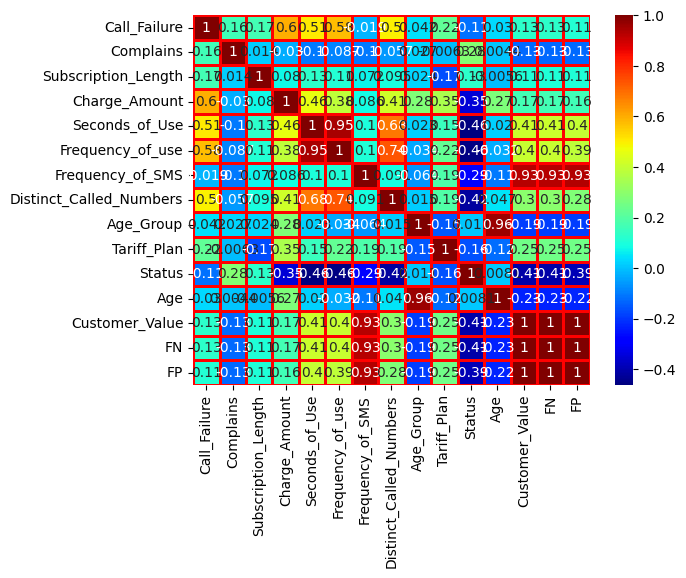

In [ ]:
# Feature Selection  
# For xtrain1
import seaborn as sns

cor = x_train1.corr()
sns.heatmap(cor,annot=True,linewidth=2, linecolor="r", cmap="jet")

In [ ]:

# function for Feature Selection
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train1, 0.8)# let 0.8 as threshold
x_train1.drop(corr_features,axis=1)
x_test1.drop(corr_features,axis=1)
print(corr_features)

{'Frequency_of_use', 'FP', 'FN', 'Age', 'Customer_Value'}


<Axes: >

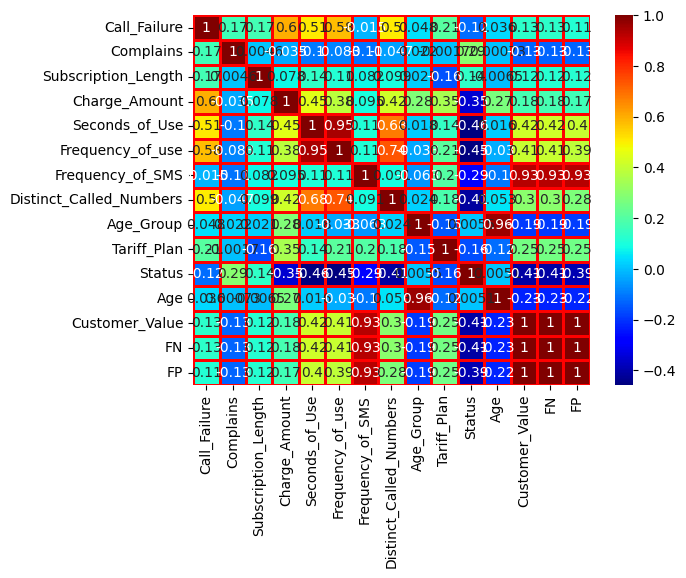

In [ ]:
# Feature Selection  
# For xtrain2
import seaborn as sns

cor = x_train2.corr()
sns.heatmap(cor,annot=True,linewidth=2, linecolor="r", cmap="jet")

In [ ]:

# function for Feature Selection
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train1, 0.8)# let 0.8 as threshold
x_train2.drop(corr_features,axis=1)
x_test2.drop(corr_features,axis=1)
print(corr_features)

{'Frequency_of_use', 'FP', 'FN', 'Age', 'Customer_Value'}


<Axes: >

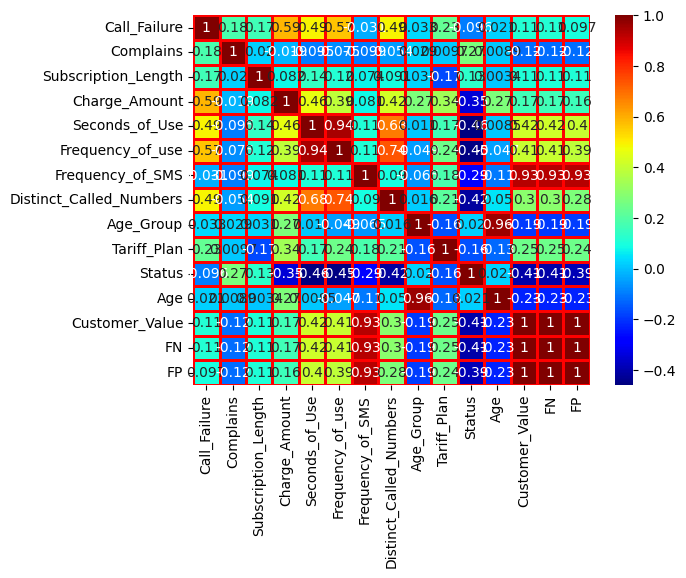

In [ ]:
# Feature Selection  
# For xtrain3
import seaborn as sns

cor = x_train3.corr()
sns.heatmap(cor,annot=True,linewidth=2, linecolor="r", cmap="jet")

In [ ]:

# function for Feature Selection
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train1, 0.8)# let 0.8 as threshold
x_train3.drop(corr_features,axis=1)
x_test3.drop(corr_features,axis=1)
print(corr_features)

{'Frequency_of_use', 'FP', 'FN', 'Age', 'Customer_Value'}


# ***Classification***
### Perceptron, LogisticRegression, SVC, KNeighborsClassifier, DecisionTreeClassifier, GaussianNB


In [ ]:
# Classification 6 modals
# use perceptron, LogisticRegression, SVC, KNeighborsClassifier, DecisionTreeClassifier, GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pyt

# Perceptron
clf1 = Perceptron(alpha=0.001, l1_ratio=0.2, max_iter=1000)

# logistic regresiion
clf2 = LogisticRegression(penalty="l2", tol=0.001, C=1.0, max_iter=10000)

# svc
clf3 = SVC(C=1.0, kernel="rbf")


# knn
clf4 = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")

# Gaussian NB
clf5 = GaussianNB(priors=None)

# tree
clf6 = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3)
 
clf = [clf1,clf2,clf3,clf4,clf5,clf6]
clf_name = ["Per", "LR", "SVC", "KNN" , "GNB", "DTC"]


Per : 0.8804232804232804
LR : 0.8825396825396825
SVC : 0.91005291005291
KNN : 0.9354497354497354
GNB : 0.6666666666666666
DTC : 0.8920634920634921
Per :               precision    recall  f1-score   support

           0       0.88      0.99      0.93       776
           1       0.86      0.40      0.54       169

    accuracy                           0.88       945
   macro avg       0.87      0.69      0.74       945
weighted avg       0.88      0.88      0.86       945

LR :               precision    recall  f1-score   support

           0       0.89      0.98      0.93       776
           1       0.84      0.43      0.56       169

    accuracy                           0.88       945
   macro avg       0.86      0.70      0.75       945
weighted avg       0.88      0.88      0.87       945

SVC :               precision    recall  f1-score   support

           0       0.91      0.99      0.95       776
           1       0.94      0.53      0.68       169

    accuracy      

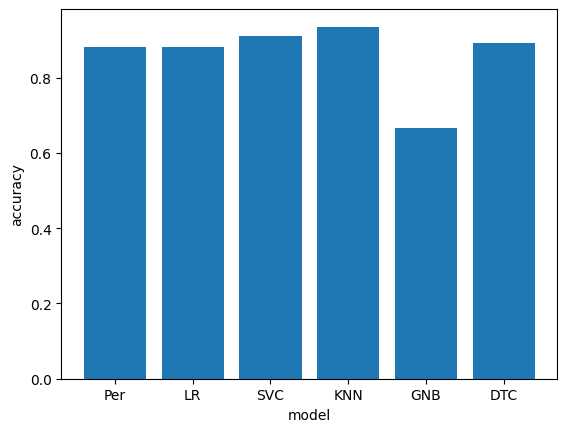

In [ ]:
# predict churn using x_train1
acc={}
T={}
for model, model_name in zip(clf, clf_name):
  model.fit(x_train1, y_train1)
  pred = model.predict(x_test1)
  acc[model_name] = accuracy_score(pred,y_test1)
  precision = precision_score(y_test1, pred)
  recall = recall_score(y_test1, pred)
  f1 = f1_score(y_test1, pred)
  # Generate a classification report
  report = classification_report(y_test1, pred)
  T[model_name] = report
for i,j in acc.items():
  print(i,":",j)
for i,j in acc.items():
  print(i,":",T[i])

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()

Per : 0.8031746031746032
LR : 0.8825396825396825
SVC : 0.9079365079365079
KNN : 0.9428571428571428
GNB : 0.6666666666666666
DTC : 0.8888888888888888
Per :               precision    recall  f1-score   support

           0       0.94      0.81      0.87       521
           1       0.46      0.76      0.57       109

    accuracy                           0.80       630
   macro avg       0.70      0.79      0.72       630
weighted avg       0.86      0.80      0.82       630

LR :               precision    recall  f1-score   support

           0       0.89      0.98      0.93       521
           1       0.80      0.43      0.56       109

    accuracy                           0.88       630
   macro avg       0.84      0.70      0.75       630
weighted avg       0.88      0.88      0.87       630

SVC :               precision    recall  f1-score   support

           0       0.91      0.99      0.95       521
           1       0.93      0.50      0.65       109

    accuracy    

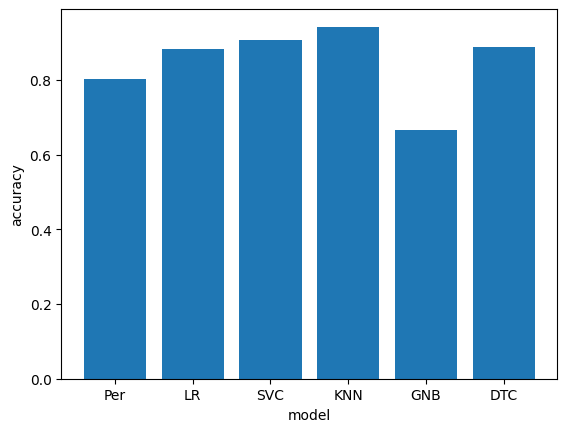

In [ ]:
# predict churn using x_train2

acc={}
T={}
for model, model_name in zip(clf, clf_name):
  model.fit(x_train2, y_train2)
  pred = model.predict(x_test2)
  acc[model_name] = accuracy_score(pred,y_test2)
  precision = precision_score(y_test2, pred)
  recall = recall_score(y_test2, pred)
  f1 = f1_score(y_test2, pred)

  # Generate a classification report
  report = classification_report(y_test2, pred)
  T[model_name] = report
for i,j in acc.items():
  print(i,":",j)
for i,j in acc.items():
  print(i,":",T[i])

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()
classi = {"KNN": "Accuracy-94.28571428571428 %"}

Per : 0.8357142857142857
LR : 0.8896825396825396
SVC : 0.9142857142857143
KNN : 0.9373015873015873
GNB : 0.6714285714285714
DTC : 0.8976190476190476
Per :               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1048
           1       0.69      0.04      0.08       212

    accuracy                           0.84      1260
   macro avg       0.76      0.52      0.49      1260
weighted avg       0.81      0.84      0.77      1260

LR :               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1048
           1       0.82      0.44      0.57       212

    accuracy                           0.89      1260
   macro avg       0.86      0.71      0.75      1260
weighted avg       0.88      0.89      0.88      1260

SVC :               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1048
           1       0.93      0.53      0.68       212

    accuracy    

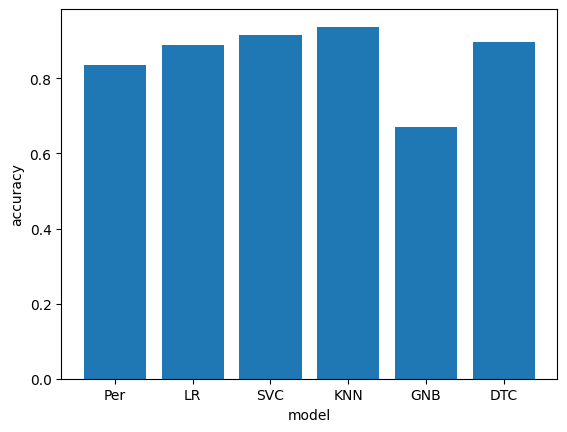

In [ ]:
# predict churn using x_train3
acc={}
T={}
for model, model_name in zip(clf, clf_name):
  model.fit(x_train3, y_train3)
  pred = model.predict(x_test3)
  acc[model_name] = accuracy_score(pred,y_test3)
  precision = precision_score(y_test3, pred)
  recall = recall_score(y_test3, pred)
  f1 = f1_score(y_test3, pred)

  # Generate a classification report
  report = classification_report(y_test3, pred)
  T[model_name] = report
for i,j in acc.items():
  print(i,":",j)
for i,j in acc.items():
  print(i,":",T[i])

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()

# ***Regression (Threshold aproach)***
### Linear Regression , DicisionTreeRegression, RandomforestRegressor, GradientBoosting Regressor, SVR


Linear Regression Metrics:
Accuracy: 0.8793650793650793
Precision: 0.8021978021978022
Recall: 0.4319526627218935
F1 Score: 0.5615384615384615

Decision Tree Regression Metrics:
Accuracy: 0.9238095238095239
Precision: 0.8012422360248447
Recall: 0.7633136094674556
F1 Score: 0.7818181818181819

Random Forest Regression Metrics:
Accuracy: 0.9375661375661376
Precision: 0.8571428571428571
Recall: 0.7810650887573964
F1 Score: 0.8173374613003095

Support Vector Regression Metrics:
Accuracy: 0.8804232804232804
Precision: 0.8414634146341463
Recall: 0.40828402366863903
F1 Score: 0.549800796812749

Gradient Boosting Regression Metrics:
Accuracy: 0.9301587301587302
Precision: 0.8551724137931035
Recall: 0.7337278106508875
F1 Score: 0.7898089171974522


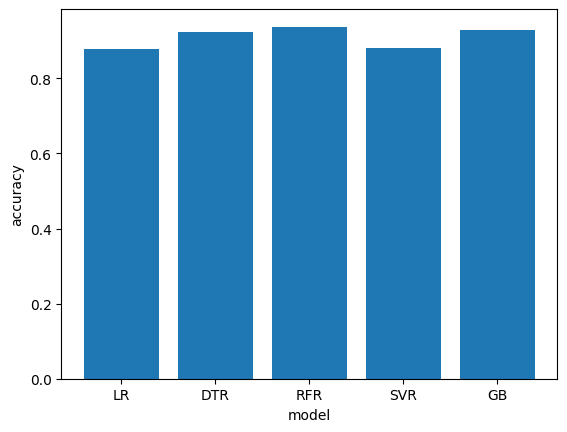

In [ ]:
# Regression done using thresold technique as it has output 0 1 
# Linear Regression , DicisionTreeRegression, RandomforestRegressor, GradientBoosting Regressor, SVR
# For (70-30) test split
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc={}
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train1, y_train1)
linear_reg_predictions = linear_reg.predict(x_test1)
linear_reg_binary_predictions = np.where(linear_reg_predictions > 0.5, 1, 0)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train1, y_train1)
dt_reg_predictions = dt_reg.predict(x_test1)
dt_reg_binary_predictions = np.where(dt_reg_predictions > 0.5, 1, 0)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train1, y_train1)
rf_reg_predictions = rf_reg.predict(x_test1)
rf_reg_binary_predictions = np.where(rf_reg_predictions > 0.5, 1, 0)

# Support Vector Regression (SVR)
svr_reg = SVR(kernel='linear')
svr_reg.fit(x_train1, y_train1)
svr_reg_predictions = svr_reg.predict(x_test1)
svr_reg_binary_predictions = np.where(svr_reg_predictions > 0.5, 1, 0)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(x_train1, y_train1)
gb_reg_predictions = gb_reg.predict(x_test1)
gb_reg_binary_predictions = np.where(gb_reg_predictions > 0.5, 1, 0)


print("Linear Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, linear_reg_binary_predictions))
print("Precision:", precision_score(y_test1, linear_reg_binary_predictions))
print("Recall:", recall_score(y_test1, linear_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, linear_reg_binary_predictions))
acc["LR"] = accuracy_score(y_test1, linear_reg_binary_predictions)
print()

print("Decision Tree Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, dt_reg_binary_predictions))
print("Precision:", precision_score(y_test1, dt_reg_binary_predictions))
print("Recall:", recall_score(y_test1, dt_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, dt_reg_binary_predictions))
acc["DTR"] = accuracy_score(y_test1, dt_reg_binary_predictions)
print()

print("Random Forest Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, rf_reg_binary_predictions))
print("Precision:", precision_score(y_test1, rf_reg_binary_predictions))
print("Recall:", recall_score(y_test1, rf_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, rf_reg_binary_predictions))
acc["RFR"] = accuracy_score(y_test1, rf_reg_binary_predictions)
print()

print("Support Vector Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, svr_reg_binary_predictions))
print("Precision:", precision_score(y_test1, svr_reg_binary_predictions))
print("Recall:", recall_score(y_test1, svr_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, svr_reg_binary_predictions))
acc["SVR"] = accuracy_score(y_test1, svr_reg_binary_predictions)
print()

print("Gradient Boosting Regression Metrics:")
print("Accuracy:", accuracy_score(y_test1, gb_reg_binary_predictions))
print("Precision:", precision_score(y_test1, gb_reg_binary_predictions))
print("Recall:", recall_score(y_test1, gb_reg_binary_predictions))
print("F1 Score:", f1_score(y_test1, gb_reg_binary_predictions))
acc["GB"] = accuracy_score(y_test1, gb_reg_binary_predictions)

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()

Linear Regression Metrics:
Accuracy: 0.8825396825396825
Precision: 0.8070175438596491
Recall: 0.42201834862385323
F1 Score: 0.5542168674698795

Decision Tree Regression Metrics:
Accuracy: 0.9222222222222223
Precision: 0.8061224489795918
Recall: 0.7247706422018348
F1 Score: 0.7632850241545894

Random Forest Regression Metrics:
Accuracy: 0.9333333333333333
Precision: 0.845360824742268
Recall: 0.7522935779816514
F1 Score: 0.796116504854369

Support Vector Regression Metrics:
Accuracy: 0.8825396825396825
Precision: 0.8431372549019608
Recall: 0.3944954128440367
F1 Score: 0.5375000000000001

Gradient Boosting Regression Metrics:
Accuracy: 0.9349206349206349
Precision: 0.8541666666666666
Recall: 0.7522935779816514
F1 Score: 0.8


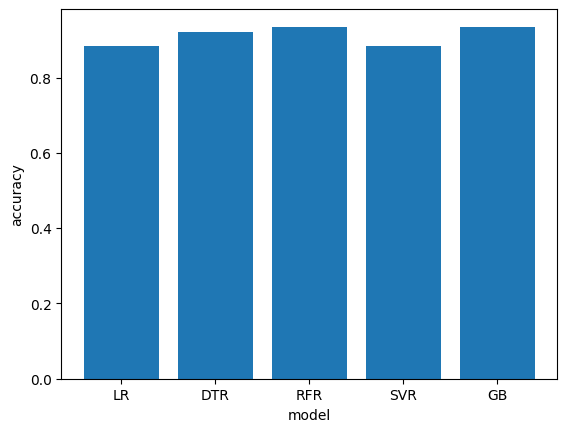

In [ ]:
# Regression done using thresold technique as it has output 0 1 
# Linear Regression , DicisionTreeRegression, RandomforestRegressor, GradientBoosting Regressor, SVR
# For (80-20) test split

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc={}
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train2, y_train2)
linear_reg_predictions = linear_reg.predict(x_test2)
linear_reg_binary_predictions = np.where(linear_reg_predictions > 0.5, 1, 0)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train2, y_train2)
dt_reg_predictions = dt_reg.predict(x_test2)
dt_reg_binary_predictions = np.where(dt_reg_predictions > 0.5, 1, 0)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train2, y_train2)
rf_reg_predictions = rf_reg.predict(x_test2)
rf_reg_binary_predictions = np.where(rf_reg_predictions > 0.5, 1, 0)

# Support Vector Regression (SVR)
svr_reg = SVR(kernel='linear')
svr_reg.fit(x_train2, y_train2)
svr_reg_predictions = svr_reg.predict(x_test2)
svr_reg_binary_predictions = np.where(svr_reg_predictions > 0.5, 1, 0)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(x_train2, y_train2)
gb_reg_predictions = gb_reg.predict(x_test2)
gb_reg_binary_predictions = np.where(gb_reg_predictions > 0.5, 1, 0)


print("Linear Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, linear_reg_binary_predictions))
print("Precision:", precision_score(y_test2, linear_reg_binary_predictions))
print("Recall:", recall_score(y_test2, linear_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, linear_reg_binary_predictions))
acc["LR"] = accuracy_score(y_test2, linear_reg_binary_predictions)
print()

print("Decision Tree Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, dt_reg_binary_predictions))
print("Precision:", precision_score(y_test2, dt_reg_binary_predictions))
print("Recall:", recall_score(y_test2, dt_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, dt_reg_binary_predictions))
acc["DTR"] = accuracy_score(y_test2, dt_reg_binary_predictions)
print()

print("Random Forest Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, rf_reg_binary_predictions))
print("Precision:", precision_score(y_test2, rf_reg_binary_predictions))
print("Recall:", recall_score(y_test2, rf_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, rf_reg_binary_predictions))
acc["RFR"] = accuracy_score(y_test2, rf_reg_binary_predictions)
print()

print("Support Vector Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, svr_reg_binary_predictions))
print("Precision:", precision_score(y_test2, svr_reg_binary_predictions))
print("Recall:", recall_score(y_test2, svr_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, svr_reg_binary_predictions))
acc["SVR"] = accuracy_score(y_test2, svr_reg_binary_predictions)
print()

print("Gradient Boosting Regression Metrics:")
print("Accuracy:", accuracy_score(y_test2, gb_reg_binary_predictions))
print("Precision:", precision_score(y_test2, gb_reg_binary_predictions))
print("Recall:", recall_score(y_test2, gb_reg_binary_predictions))
print("F1 Score:", f1_score(y_test2, gb_reg_binary_predictions))
acc["GB"] = accuracy_score(y_test2, gb_reg_binary_predictions)

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()

Linear Regression Metrics:
Accuracy: 0.8920634920634921
Precision: 0.7753623188405797
Recall: 0.5047169811320755
F1 Score: 0.6114285714285714

Decision Tree Regression Metrics:
Accuracy: 0.9261904761904762
Precision: 0.8082901554404145
Recall: 0.7358490566037735
F1 Score: 0.7703703703703704

Random Forest Regression Metrics:
Accuracy: 0.942063492063492
Precision: 0.8677248677248677
Recall: 0.7735849056603774
F1 Score: 0.8179551122194514

Support Vector Regression Metrics:
Accuracy: 0.8912698412698413
Precision: 0.8571428571428571
Recall: 0.42452830188679247
F1 Score: 0.5678233438485805

Gradient Boosting Regression Metrics:
Accuracy: 0.9349206349206349
Precision: 0.8494623655913979
Recall: 0.7452830188679245
F1 Score: 0.7939698492462313


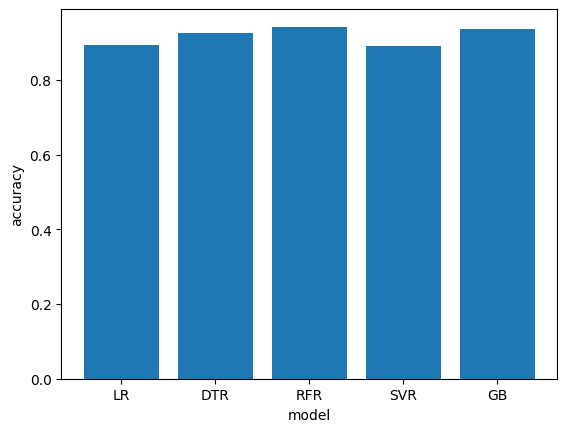

In [ ]:
# Regression done using thresold technique as it has output 0 1 
# Linear Regression , DicisionTreeRegression, RandomforestRegressor, GradientBoosting Regressor, SVR
# For (60-40) test split

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc={}
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train3, y_train3)
linear_reg_predictions = linear_reg.predict(x_test3)
linear_reg_binary_predictions = np.where(linear_reg_predictions > 0.5, 1, 0)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train3, y_train3)
dt_reg_predictions = dt_reg.predict(x_test3)
dt_reg_binary_predictions = np.where(dt_reg_predictions > 0.5, 1, 0)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train3, y_train3)
rf_reg_predictions = rf_reg.predict(x_test3)
rf_reg_binary_predictions = np.where(rf_reg_predictions > 0.5, 1, 0)

# Support Vector Regression (SVR)
svr_reg = SVR(kernel='linear')
svr_reg.fit(x_train3, y_train3)
svr_reg_predictions = svr_reg.predict(x_test3)
svr_reg_binary_predictions = np.where(svr_reg_predictions > 0.5, 1, 0)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(x_train3, y_train3)
gb_reg_predictions = gb_reg.predict(x_test3)
gb_reg_binary_predictions = np.where(gb_reg_predictions > 0.5, 1, 0)

print("Linear Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, linear_reg_binary_predictions))
print("Precision:", precision_score(y_test3, linear_reg_binary_predictions))
print("Recall:", recall_score(y_test3, linear_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, linear_reg_binary_predictions))
acc["LR"] = accuracy_score(y_test3, linear_reg_binary_predictions)
print()

print("Decision Tree Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, dt_reg_binary_predictions))
print("Precision:", precision_score(y_test3, dt_reg_binary_predictions))
print("Recall:", recall_score(y_test3, dt_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, dt_reg_binary_predictions))
acc["DTR"] = accuracy_score(y_test3, dt_reg_binary_predictions)
print()

print("Random Forest Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, rf_reg_binary_predictions))
print("Precision:", precision_score(y_test3, rf_reg_binary_predictions))
print("Recall:", recall_score(y_test3, rf_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, rf_reg_binary_predictions))
acc["RFR"] = accuracy_score(y_test3, rf_reg_binary_predictions)
print()

print("Support Vector Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, svr_reg_binary_predictions))
print("Precision:", precision_score(y_test3, svr_reg_binary_predictions))
print("Recall:", recall_score(y_test3, svr_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, svr_reg_binary_predictions))
acc["SVR"] = accuracy_score(y_test3, svr_reg_binary_predictions)
print()

print("Gradient Boosting Regression Metrics:")
print("Accuracy:", accuracy_score(y_test3, gb_reg_binary_predictions))
print("Precision:", precision_score(y_test3, gb_reg_binary_predictions))
print("Recall:", recall_score(y_test3, gb_reg_binary_predictions))
print("F1 Score:", f1_score(y_test3, gb_reg_binary_predictions))
acc["GB"] = accuracy_score(y_test3, gb_reg_binary_predictions)

pyt.ylabel("accuracy")
pyt.xlabel("model")
pyt.bar(acc.keys(),acc.values())
pyt.show()

# **Result**




In [ ]:
print("This Result on basis of accuracy:")
print("For Classification:")
print("KNeighborsClassifier is best with",classi["KNN"])
print("With 80 20 split")
print()
print("For Regression:")
print("Random Forest Regression is best with Accuracy-",accuracy_score(y_test3, dt_reg_binary_predictions))
print("With 60 40 split")

This Result on basis of accuracy:
For Classification:
KNeighborsClassifier is best with Accuracy-94.28571428571428 %
With 80 20 split

For Regression:
Random Forest Regression is best with Accuracy- 0.9261904761904762
With 60 40 split
